In [ ]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].value_counts()


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df.shape

(5110, 12)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(4909, 12)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.drop('id',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


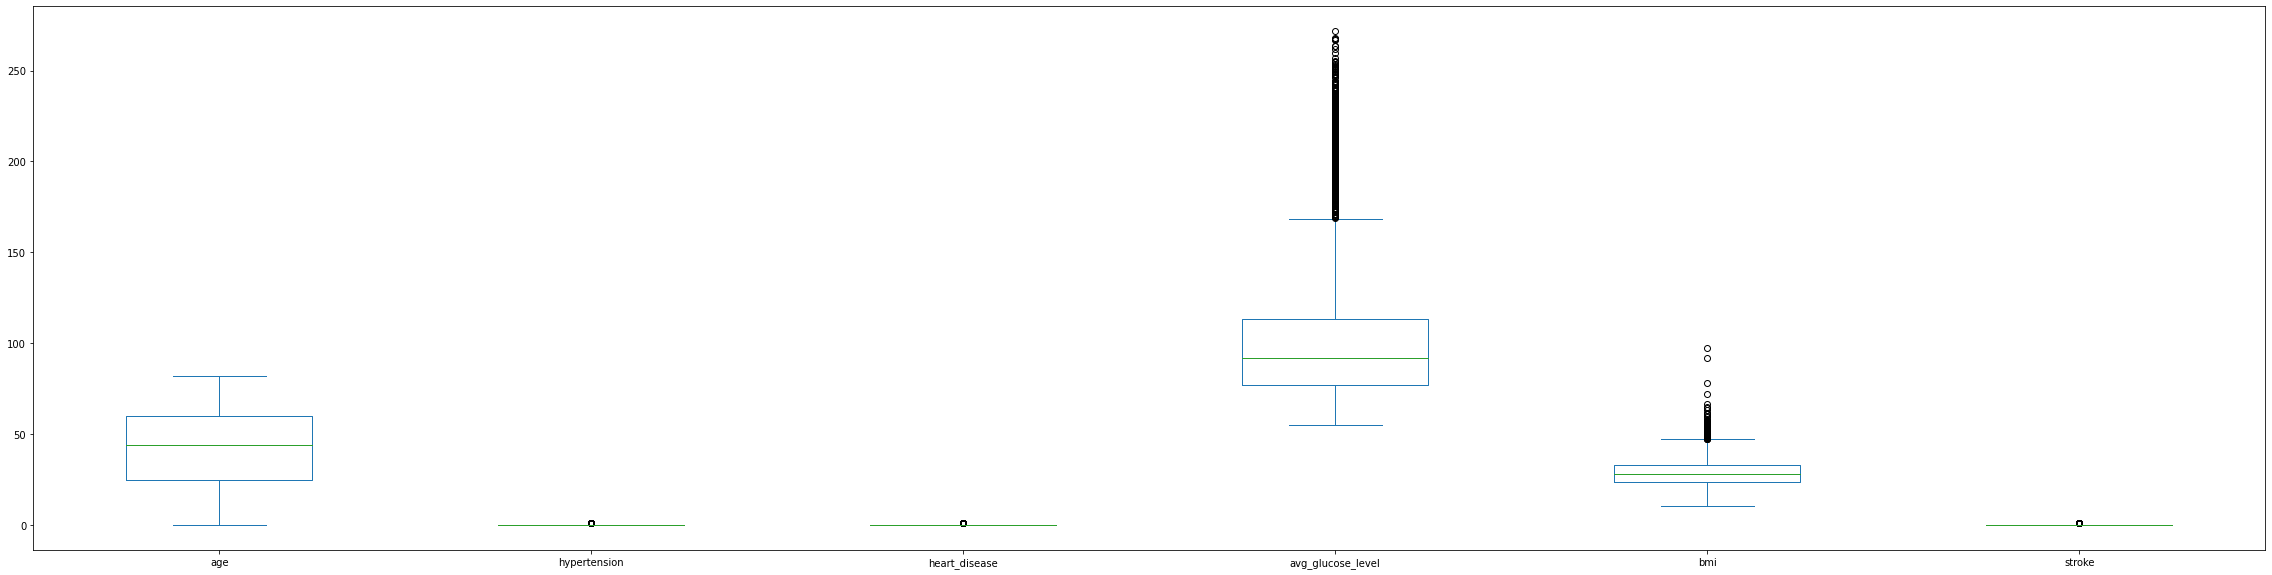

In [ ]:
#Outlier Removal by Checking in boxplot
import seaborn as sns
p.rcParams['figure.figsize']=(40,10)
df.plot(kind='box')
p.show()

In [ ]:
df['avg_glucose_level'].value_counts

<bound method IndexOpsMixin.value_counts of 0       228.69
2       105.92
3       171.23
4       174.12
5       186.21
         ...  
5104    103.08
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 4909, dtype: float64>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()

In [ ]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [ ]:
df['gender']=gender
df['smoking_status']=smoking_status
df['work_type']=work_type
df['Residence_type']=Residence_type
df['ever_married']=ever_married

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['gender'].tail()

5104    0
5106    0
5107    0
5108    1
5109    0
Name: gender, dtype: int64

In [ ]:
df['smoking_status'].head()

0    1
2    2
3    3
4    2
5    1
Name: smoking_status, dtype: int64

In [ ]:
df['work_type'].tail()

5104    4
5106    3
5107    3
5108    2
5109    0
Name: work_type, dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [ ]:
x = df.drop('stroke',axis = 1)

In [ ]:
y = df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 2)

In [ ]:
train_x,train_y=smote.fit_resample(x_train,y_train)
test_x,test_y=smote.fit_resample(x_test,y_test)

In [ ]:
train_x_val = train_x.values
test_x_val = test_x.values

In [ ]:
print(x_test.shape)

(982, 10)


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7542, 10)
(7542,)
(1858, 10)
(1858,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
x_train_std = std.fit_transform(train_x)

In [ ]:
x_test_std = std.fit_transform(test_x)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score

In [ ]:
!pip install xgboost==1.6.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 63 kB/s 


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)

In [ ]:
xgc.fit(train_x_val,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
predicted_val = xgc.predict(test_x_val)

In [ ]:
print('Accuracy --> ',accuracy_score(predicted_val, test_y))

Accuracy -->  0.8315392895586652


In [ ]:
import joblib
filename = 'xgbooster-new-version-model-joblib-file.sav'
joblib.dump(xgc, open(filename,'wb'))